<img src="Branded_Logo_CUDenver.PNG" width="150">

## <center>CSCI 4580/5580 - Data Science – Spring 2022</center>
<center>Assignment 1: Exploratory Data Analysis and Statistics</center><center><font color='red'>Deadline: March 17, 2022 - 11:59 PM</font></center><center>Total Points: 100</center>

## Instructions
- Please note that this assignment must be done individually. By submitting this lab, you certify that this is your own work, your code will be checked against other submissions and resources using automatic tools. Everyone should be getting a hands on experience in this course. You are free to discuss course material with fellow students, and we encourage you to use Internet resources to aid your understanding, but the work you turn in, including all code and answers, must be your own work.

## Deliverables
You need to submit a single .ipynb file on Canvas, names your-lastname_your-first-name.ipynb. For example, if your name is John Smith, you should name the file smith_john.ipynb.
- Please do not include extra files such as the input datasets in your submission.
- Answer Questions 1 - 10 in the designated cells. Please do not add or remove any cells. 
- Please download your submission file after submission and make sure it is not corrupted. Use the 'Run All' option from the 'Cell' menu to ensure all cells run without any issues. We will not be responsible for corrupted submissions and will not take a resubmission after the deadline.

## Need Help?
If you need help with this lab, please email me at sundous.hussein@ucdenver.edu or come to my office hours. We also encourage you to ask your questions on the designated channel for the lab on Microsoft Teams. This way, you may receive assistance from your classmates that might’ve ran through the same issues.

# Overview
Exploratory Data Analysis (EDA) is the process of examining and visualizing a novel dataset to understand its characteristics and patterns, before attempting more formal analysis. 

### The Dataset

The dataset for this assignment is the Abalone Dataset. The dataset contains various attributs of abalone and is typically used to predict the age of abalone from physical measurements.

The data directory contains the following 2 files:

<b>abalone.data: </b> CSV file with attributes of 4177 abalones.

<b>abalone.names: </b> Text file containing full description of the dataset.

## Part 1: Reading the Dataset

#### Question 1 [5 Points]

Step 1 is to read the dataset. Look at the first few lines of the file. Notice that most columns are numeric, but the first collumn is string with one of three values (gender). 

In [1]:
import csv
def loaddatafile(fname):
    # Add your code here
    with open('abalone.data') as csvfile:
        data = list(csv.reader(csvfile))
    
    return data

'abalone_raw' should be a list of records, and each record should be a list of strings

In [2]:
abalone_raw = loaddatafile("data/abalone.data")
print(abalone_raw[0])

['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15']


#### Question 2 [15 Points]
Now construct the variable 'abalone' which is list of list of numbers from abalone_raw by parsing the numeric strings to float values. For the first column, map the string values to numeric ones. 
Create a dictionary 'sex_to_number' and inverse dictionary 'number_to_sex' to map between the string values and numeric values. 

In [3]:
# Convert the string table to a numeric one, and return the dictionaries
def raw_to_data(data):
    # sexes consist of M, F, or I when looking at abalone.data
    sex_to_numbers = {'M':0, 'F':1, 'I':2}
    numbers_to_sex = {0:'M', 1:'F', 2:'I'}
    # parse the numeric strings to float values,
    # by checking gender element in each row, found in the 0th index
    for row in data:
        check_gender = row[0]
        if check_gender == 'M':
            row[0] = 0
        elif check_gender == 'F':
            row[0] = 1
        elif check_gender == 'I':
            row[0] = 2
            
        for i, ele in enumerate(row):
            if i == 0:
                continue
                # to float values
            row[i] = float(ele)
    numeric = []
    numeric = data
    return numeric, sex_to_numbers, numbers_to_sex

In [4]:
abalone, sex_to_numbers, numbers_to_sex = raw_to_data(abalone_raw)
print (f'sex to numbers: {sex_to_numbers}')
print (f'numbers to sex: {numbers_to_sex}')
print (f'the first row of the numerical data: {abalone[0]}')

sex to numbers: {'M': 0, 'F': 1, 'I': 2}
numbers to sex: {0: 'M', 1: 'F', 2: 'I'}
the first row of the numerical data: [0, 0.455, 0.365, 0.095, 0.514, 0.2245, 0.101, 0.15, 15.0]


## Part 2: Basic Statistics

#### Question 3 [5 Points]
Create a list of the column names for this dataset from the dataset description. Preserve the case and the spaces in these names.

In [5]:
# column names in the dataset provided
col_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

#### Question 4 [5 Points]
Now create a dictionary 'name_to_index' mapping column name to column.

In [6]:
# Add your code here
# dict is column_name : column num
name_to_index = {'Sex':0, 'Length':1, 'Diameter':2, 'Height':3, 'Whole weight':4, 'Shucked weight':5, 'Viscera weight':6, 'Shell weight':7, 'Rings':8}

#### Question 5 [10 Points]
Use name_to_index to define a get_column function which returns a named column from the abalone table.

In [7]:
def get_column(name):
    # pass a col name
    list_data_from_col_name = []
    for row in abalone:
        list_data_from_col_name.append(row[name_to_index[name]])
        
    return list_data_from_col_name

In [8]:
print(get_column('Height'))

[0.095, 0.09, 0.135, 0.125, 0.08, 0.095, 0.15, 0.125, 0.125, 0.15, 0.14, 0.11, 0.135, 0.145, 0.1, 0.13, 0.085, 0.1, 0.08, 0.1, 0.095, 0.1, 0.155, 0.135, 0.165, 0.14, 0.185, 0.14, 0.18, 0.14, 0.165, 0.165, 0.165, 0.175, 0.2, 0.105, 0.155, 0.105, 0.135, 0.09, 0.105, 0.135, 0.045, 0.055, 0.05, 0.095, 0.12, 0.12, 0.07, 0.16, 0.12, 0.095, 0.13, 0.12, 0.1, 0.14, 0.12, 0.135, 0.06, 0.125, 0.105, 0.11, 0.13, 0.095, 0.12, 0.12, 0.16, 0.185, 0.12, 0.07, 0.13, 0.11, 0.17, 0.175, 0.195, 0.15, 0.14, 0.15, 0.14, 0.17, 0.14, 0.175, 0.165, 0.16, 0.14, 0.18, 0.14, 0.16, 0.13, 0.16, 0.135, 0.15, 0.175, 0.165, 0.19, 0.195, 0.15, 0.13, 0.13, 0.125, 0.095, 0.145, 0.16, 0.14, 0.16, 0.155, 0.165, 0.125, 0.135, 0.105, 0.125, 0.105, 0.08, 0.105, 0.125, 0.115, 0.135, 0.105, 0.15, 0.085, 0.105, 0.085, 0.14, 0.075, 0.08, 0.06, 0.09, 0.085, 0.16, 0.165, 0.165, 0.125, 0.09, 0.095, 0.065, 0.115, 0.08, 0.09, 0.11, 0.095, 0.155, 0.145, 0.19, 0.155, 0.13, 0.125, 0.12, 0.08, 0.055, 0.095, 0.145, 0.185, 0.19, 0.16, 0.135

#### Question 6 [10 Points]
use numpy to compute the min, max, average and std deviation of the Height column.

In [9]:
# must import numpy to use popular numpy methods
import numpy as np

# get the 'Height' column
heights = get_column('Height')
# create a height statistics list
height_stats = []

# find the min, max, avgerage, and std deviation of the Height column
height_stats.append(np.min(heights))
height_stats.append(np.max(heights))
height_stats.append(np.average(heights))
height_stats.append(np.std(heights))

# print the min, max, avg, and std deviation of the Height column
print(f'min: {height_stats[0]}')
print(f'max: {height_stats[1]}')
print(f'average: {height_stats[2]}')
print(f'std: {height_stats[3]}')

min: 0.0
max: 1.13
average: 0.13951639932966242
std: 0.04182204947769995


#### Question 7 [15 Points]
Now create a 9x5 pandas dataframe. Each row of the table should be a column name followed by the values of min, max, mean, and std for that column.

In [10]:
# must import pandas
import pandas as pd
summaries = []

# I need to make a list of mins, a list of maxes, etc etc
# I can find each min, and make a list, and rinse and repeat
sexes = get_column('Sex')
lengths = get_column('Length')
diameters = get_column('Diameter')
# have height already recall it is heights = get_column('Height')
whole_weights = get_column('Whole weight')
shucked_weights = get_column('Shucked weight')
viscera_weights = get_column('Viscera weight')
shell_weights = get_column('Shell weight')
rings = get_column('Rings')

all_minimums_list = []  # to hold all mins
all_maximums_list = []  # to hold all max
all_averages_list = []  # to hold all averages
all_std_list = []       # to hold all standard devi's

# sexes
all_minimums_list.append(np.min(sexes))
all_maximums_list.append(np.max(sexes))
all_averages_list.append(np.average(sexes))
all_std_list.append(np.std(sexes))
# lengths
all_minimums_list.append(np.min(lengths))
all_maximums_list.append(np.max(lengths))
all_averages_list.append(np.average(lengths))
all_std_list.append(np.std(lengths))
# diameters
all_minimums_list.append(np.min(diameters))
all_maximums_list.append(np.max(diameters))
all_averages_list.append(np.average(diameters))
all_std_list.append(np.std(diameters))
# heights
all_minimums_list.append(np.min(heights))
all_maximums_list.append(np.max(heights))
all_averages_list.append(np.average(heights))
all_std_list.append(np.std(heights))
# whole_weights
all_minimums_list.append(np.min(whole_weights))
all_maximums_list.append(np.max(whole_weights))
all_averages_list.append(np.average(whole_weights))
all_std_list.append(np.std(whole_weights))
# shucked_weights
all_minimums_list.append(np.min(shucked_weights))
all_maximums_list.append(np.max(shucked_weights))
all_averages_list.append(np.average(shucked_weights))
all_std_list.append(np.std(shucked_weights))
# viscera_weights
all_minimums_list.append(np.min(viscera_weights))
all_maximums_list.append(np.max(viscera_weights))
all_averages_list.append(np.average(viscera_weights))
all_std_list.append(np.std(viscera_weights))
# shell_weights
all_minimums_list.append(np.min(shell_weights))
all_maximums_list.append(np.max(shell_weights))
all_averages_list.append(np.average(shell_weights))
all_std_list.append(np.std(shell_weights))
# rings
all_minimums_list.append(np.min(rings))
all_maximums_list.append(np.max(rings))
all_averages_list.append(np.average(rings))
all_std_list.append(np.std(rings))

# 0 based indexing, so 0-8 is 9x5 dataframe
grid = {'Column Name':col_names, 'Minimum':all_minimums_list, 'Maximum':all_maximums_list, 'Mean / Avg':all_averages_list, 'Standard Deviation':all_std_list}
summaries = pd.DataFrame(grid)

summaries

# I feel like I could have made this incredibly more efficient somehow
# note-to-self: comeback to try and make better if can

,Column Name,Minimum,Maximum,Mean / Avg,Standard Deviation
0,Sex,0.0000,2.0000,0.955470,0.827716
1,Length,0.0750,0.8150,0.523992,0.120079
2,Diameter,0.0550,0.6500,0.407881,0.099228
3,Height,0.0000,1.1300,0.139516,0.041822
4,Whole weight,0.0020,2.8255,0.828742,0.490330
5,Shucked weight,0.0010,1.4880,0.359367,0.221936
6,Viscera weight,0.0005,0.7600,0.180594,0.109601
7,Shell weight,0.0015,1.0050,0.238831,0.139186
8,Rings,1.0000,29.0000,9.933684,3.223783


## Part 3: Histograms

#### Question 8 [15 Points]
Now create a 3x3 grid of histograms, one for each column. Make sure your figure is large enough (should consume most of the width of the page). We recommend you use matplotlib.pyplot and its 'subplots' function. Include the column name as a title above each subfigure. You must use loops rather than enumerating all 9 column names.

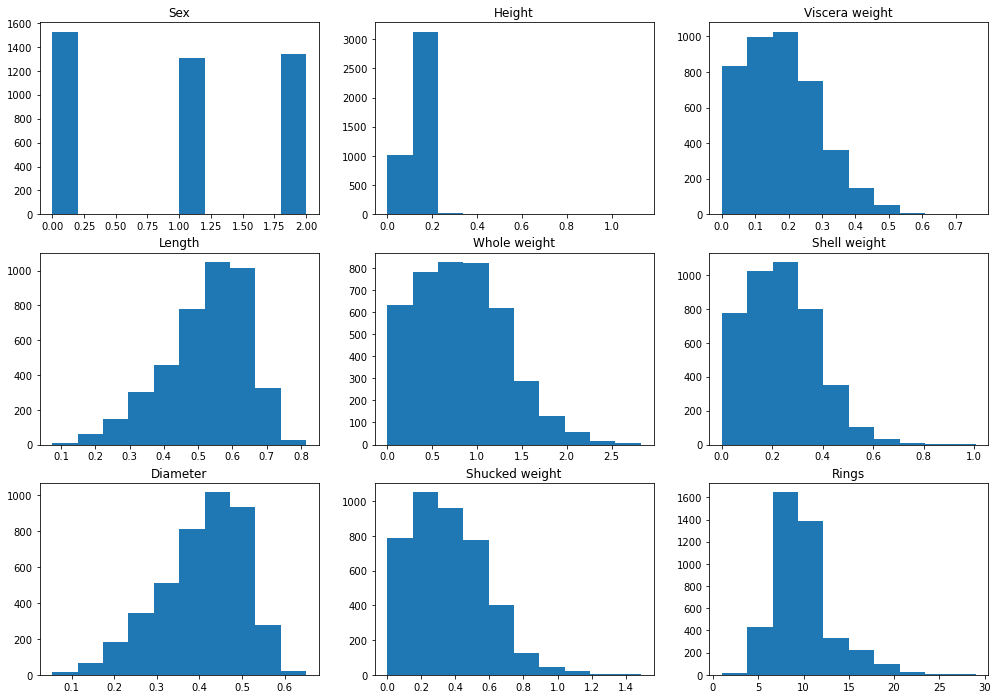

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 3, figsize=(17,12))  # asks to make figures large enough to width of page

# must use loops rather than enumerating all 9 column names
for the_name in col_names:
    # get each column by name
    the_column = get_column(the_name)
    # use our mapping of name to index dict to find position
    pos = name_to_index[the_name]
    # 3 x 3 grid, there are 9 entries any more or less would cause out of bounds or awkward spread across plot (tested)
    x = pos % 3
    y = pos // 3
    # must be a histogram of each column
    ax[x,y].hist(the_column)
    # set the title for each plot
    ax[x,y].set_title(the_name)
    
plt.show()

## Part 4: Scatter plots

#### Question 9 [15 Points]
Now ceate a grid of scatter plots for each column vs the "Rings" column. Use color to distinguish the sex of the specimen in each plot. Make titles of the form "&lt;colname&gt; vs Rings". Its fine to include "Rings vs Rings" as the last plot. Add regression lines to the scatter plots.

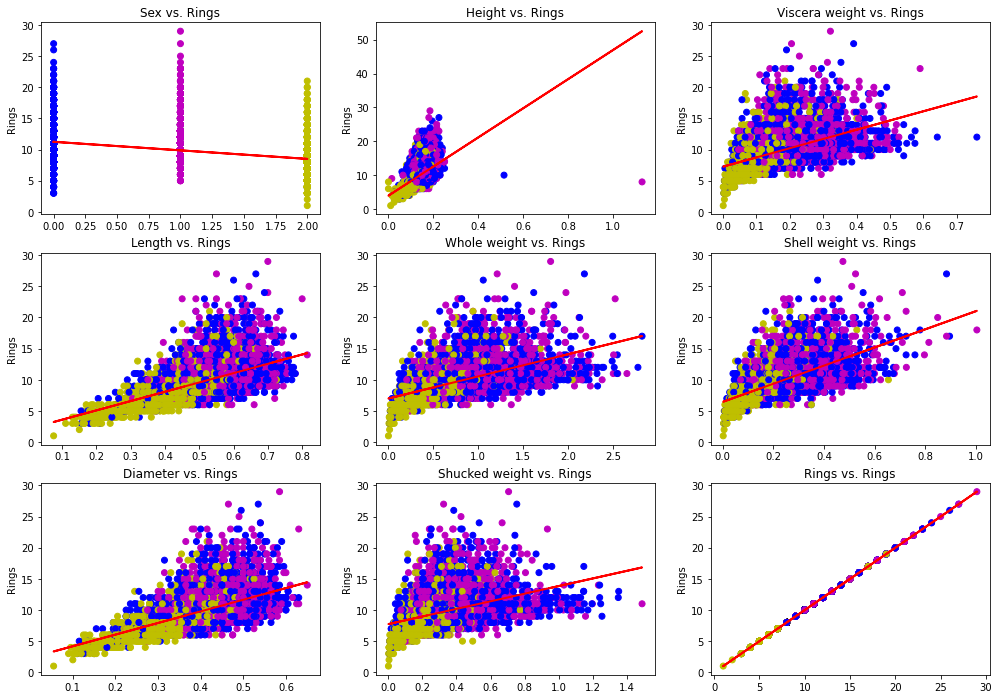

In [13]:
# everything vs. rings
rings = get_column("Rings")
sex = get_column("Sex")
fig, ax = plt.subplots(3, 3, figsize=(17,12))

# need to add colors to the sexs, given sex = get_column, now assign colors to each sex M, F, or I
color_of_sexes = np.array(['b','m','y'])  # M = blue, F = magenta, I = yellow

for the_name in col_names:
    # get each column by name
    the_column = get_column(the_name)
    # use our mapping of name to index dict to find position
    pos = name_to_index[the_name]
    # 3 x 3 grid, there are 9 entries any more or less would cause out of bounds or awkward spread across plot (tested)
    x = pos % 3
    y = pos // 3
    # same as before, just doing scatter plot instead, from the column to rings, and sexes color coded
    ax[x,y].scatter(the_column, rings, c=color_of_sexes[sex])
    
    # set the titles to be the "the_name vs Rings", last one can be Rings vs Rings
    ax[x,y].set_title(the_name + ' vs. Rings')
    ax[x,y].set_ylabel('Rings') # added y-label to clearly show that y-axis is the Ring's since min = 1, max = 29
    # ax[x,y].set_xlabel(the_name) # removed x-label because it would clash with title of the other subplots, sadly
    
    # adding a regression line (inspiration from lab2)
    m, b = np.polyfit(the_column, rings, 1)
    # have to cast to make dtype float or error occurs, also added linewidth for more pronounced line
    ax[x,y].plot(the_column, m*np.array(the_column,dtype=float) + b, '-', linewidth=2, color='red')

plt.show()

#### Question 10 [5 Points]
Do you notice any issues with the dataset? e.g. outliers?

Answer:
Rings vs. Rings is as should be so it let's me know the regression line worked correctly when implementing this, from the data however, we can see in different subplots where outliers are really prevelent.  In my opinion whenever there is a huge spread departing further and further from our regression line, we start to have more and more outliers when comparing a column versus rings specifically.  To be more specific though, we can see these outliers highlights very well as the individual scattered dots appear very far and more alone such as in height vs. rings, diameter vs. rings, shucked weight vs. rings for example.  Of course these outliers occure in almost every subplot to be fair